<a href="https://colab.research.google.com/github/jeonghojo00/MachineLearning/blob/main/DefaultCreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

## Data loading

In [2]:
# Change directory to the package folder
%cd '/content/drive/MyDrive/Colab Notebooks/DB/'
# Verify the contents of the current folder
!ls

/content/drive/MyDrive/Colab Notebooks/DB
annotations	       densenet161_cifar10_20220408.pt
cifar10		       dog.jpg
cifar10_128	       dogs_vs_cats
cifar10_224	       dogs-vs-cats
cifar10_299	       enron_corpus
cifar10_32	       images
cifar10_63	       LibriSpeech
cifar10_64	       lightning_logs
cifar10_96	       minmaxscaler.save
coco2017	       mnist
creditcard.csv	       model
deafultCredit_dt.sav   resnet18_mnist_20220407.pt
deafultCredit_gb.sav   result
deafultCredit_knn.sav  study_20220407.pkl
deafultCredit_lr.sav   study_cifar10_20220408.pkl
deafultCredit_nb.sav   study_cifar10_latestModels_20220410.pkl
deafultCredit_rf.sav   study.pkl
deafultCredit_svm.sav  train2017
defaultCreditCard


In [3]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

## Data Exploration

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Features V1-V28 indicates results of PCA to protect user identities(information)
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [5]:
print(f"Default Credit Card dataset consists of {len(df)} data")

Default Credit Card dataset consists of 284807 data


{0: 284315, 1: 492}
0(Non-Fraud) Class consists of 99.827% of dataset
1(Fraud) Class consists of 0.173% of dataset


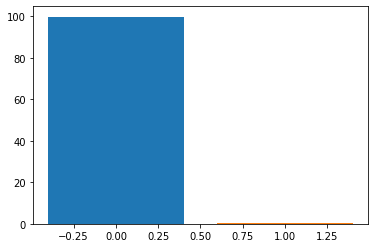

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

df_info = dict(Counter(df['Class']))
print(df_info)

for key in df_info:
    print(f"{key}({'Fraud' if key==1 else 'Non-Fraud'}) Class consists of {100*df_info[key]/len(df):.3f}% of dataset")
    plt.bar(key, 100*df_info[key]/len(df))
plt.show()

0(Non-Fraud) Class consists of 99.827% of dataset and </br>
1(Fraud) Class consists of 0.173% of dataset indicating that it is very Imbalanced dataset

# Classification
1. Algorithms
- Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest, and Gradient Boosting
2. Evaluation Metrics
- Due to imbalanced dataset, ROC curve and Precision-Recall curve

## Data Splitting

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
from sklearn.preprocessing import label_binarize

# Split into X and y
df_np = df.to_numpy()
X = df_np[:, :-1]  
y = df_np[:, -1]  
print(X[0])
print(y[0])

[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02  2.53634674e+00
  1.37815522e+00 -3.38320770e-01  4.62387778e-01  2.39598554e-01
  9.86979013e-02  3.63786970e-01  9.07941720e-02 -5.51599533e-01
 -6.17800856e-01 -9.91389847e-01 -3.11169354e-01  1.46817697e+00
 -4.70400525e-01  2.07971242e-01  2.57905802e-02  4.03992960e-01
  2.51412098e-01 -1.83067779e-02  2.77837576e-01 -1.10473910e-01
  6.69280749e-02  1.28539358e-01 -1.89114844e-01  1.33558377e-01
 -2.10530535e-02  1.49620000e+02]
0.0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Split data into test and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Normalization
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

# Standardization
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

    1. Machine learning algorithms like “Linear Regression”, “Logistic Regression”, “Neural Network” that use Gradient Descent as an optimization technique DO REQUIRE data to be scaled.
        1. Difference in ranges of features will cause different step sizes for each feature.
        2. We scale the data to ensure the gradient descent moves smoothly towards the minima before feeding it to the model
    2. Distance-based algorithms such as KNN, K-means, and SVM DO REQUIRE data to be scaled because the effect is conspicuous when we compare Euclidean distance.
    3. Tree-Based algorithms DO NOT REQUIRE the data to be scaled.

## Build classification model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from numpy import mean
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


See which scaler perform good

1. Train </br>
Without scaler = (X_train, y_train) </br>
Normalization = (X_train_minmax, y_train) </br>
Standardization = (X_train_standard, y_train) </br>

2. Evaluate </br>
Without scaler = X_test </br>
Normalization = X_test_minmax </br>
Standardization = X_test_standard </br>


### Train the Model using Loaded Supervised Learning models
According to the result of experiments using "without scaler", "Minmax Scaler", and "Standard Scaler", each model is trained using the one with the best performance

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
f1_res = {}
roc_auc_res = {}

# Linear Regressoin (Standardization)
lr = LogisticRegression(class_weight='balanced')
f1_scores      = cross_val_score(lr, X_train_standard, y_train, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores = cross_val_score(lr, X_train_standard, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
f1_res['lr'] = mean(f1_scores)
roc_auc_res['lr'] = mean(roc_auc_scores)

# K Nearest Neighbor (Normalization)
knn = KNeighborsClassifier(n_neighbors=2)
f1_scores      = cross_val_score(knn, X_train_minmax, y_train, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores = cross_val_score(knn, X_train_minmax, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
f1_res['knn'] = mean(f1_scores)
roc_auc_res['knn'] = mean(roc_auc_scores)

# Support Vector Machine (Standardization)
svm = LinearSVC(dual=False)
f1_scores      = cross_val_score(svm, X_train_standard, y_train, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores = cross_val_score(svm, X_train_standard, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
f1_res['svm'] = mean(f1_scores)
roc_auc_res['svm'] = mean(roc_auc_scores)

# Naive Bayes (Standardization)
nb = GaussianNB().fit(X_train_standard, y_train)
f1_scores      = cross_val_score(nb, X_train_standard, y_train, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores = cross_val_score(nb, X_train_standard, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
f1_res['nb'] = mean(f1_scores)
roc_auc_res['nb'] = mean(roc_auc_scores)

# Decision Tree (Without Scaler)
dt = DecisionTreeClassifier()
f1_scores      = cross_val_score(dt, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores = cross_val_score(dt, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
f1_res['dt'] = mean(f1_scores)
roc_auc_res['dt'] = mean(roc_auc_scores)

# Random Forest (Without Scaler)
rf = RandomForestClassifier()
f1_scores      = cross_val_score(rf, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
f1_res['rf'] = mean(f1_scores)
roc_auc_res['rf'] = mean(roc_auc_scores)

# Gradient Boosting (Without Scaler)
gb = GradientBoostingClassifier()
f1_scores      = cross_val_score(gb, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores = cross_val_score(gb, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
f1_res['gb'] = mean(f1_scores)
roc_auc_res['gb'] = mean(roc_auc_scores)

# Balanced Bagging (Updated Version of Bagging for Imbalanced Dataset, scikit-learn-1.0)
bb = BalancedBaggingClassifier()
f1_scores      = cross_val_score(bb, X_train_standard, y_train, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores = cross_val_score(bb, X_train_standard, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
f1_res['bb'] = mean(f1_scores)
roc_auc_res['bb'] = mean(roc_auc_scores)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-pack

In [ ]:
f1_res

{'bb': nan,
 'dt': 0.7658565243150713,
 'gb': 0.6346304597983029,
 'knn': 0.8200645507468115,
 'lr': 0.13137960040364977,
 'nb': 0.11753057683232888,
 'rf': 0.8536173056672829,
 'svm': 0.7606172970007112}

In [ ]:
roc_auc_res

{'bb': nan,
 'dt': 0.8807338033479101,
 'gb': 0.6959013596899909,
 'knn': 0.9103908171097379,
 'lr': 0.9788856206377917,
 'nb': 0.96500198290134,
 'rf': 0.9538502022772026,
 'svm': 0.964520448548533}

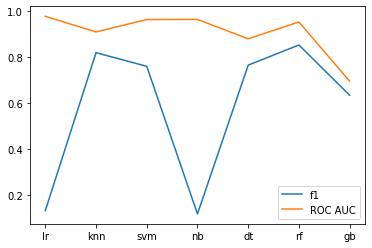

In [ ]:
models = ['lr', 'knn', 'svm', 'nb', 'dt', 'rf', 'gb', 'bb']
f1_list = []
roc_list = []

for model in models:
    f1_list.append(f1_res[model])
    roc_list.append(roc_auc_res[model])

plt.plot(models, f1_list, label='f1')
plt.plot(models, roc_list, label='ROC AUC')
plt.legend(loc='best')
plt.show()

In [21]:
# Linear Regressoin (Standardization)
lr = LogisticRegression(class_weight='balanced').fit(X_train_standard, y_train)
# K Nearest Neighbor (Normalization)
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train_minmax, y_train)
# Support Vector Machine (Standardization)
svm = LinearSVC(dual=False).fit(X_train_standard, y_train)
# Naive Bayes (Standardization)
nb = GaussianNB().fit(X_train_standard, y_train)
# Decision Tree (Without Scaler)
dt = DecisionTreeClassifier().fit(X_train, y_train)
# Random Forest (Without Scaler)
rf = RandomForestClassifier().fit(X_train, y_train)
# Gradient Boosting (Without Scaler)
gb = GradientBoostingClassifier().fit(X_train, y_train)
# Balanced Bagging
bb = BalancedBaggingClassifier().fit(X_train_standard, y_train)

### Save models and scalers

In [ ]:
# Save models
import pickle

# save the model to disk
model_path = './defaultCreditCard/'
filename = 'deafultCredit_lr.sav'
pickle.dump(lr, open(model_path+filename, 'wb'))

filename = 'deafultCredit_knn.sav'
pickle.dump(knn, open(model_path+filename, 'wb'))

filename = 'deafultCredit_svm.sav'
pickle.dump(svm, open(model_path+filename, 'wb'))

filename = 'deafultCredit_nb.sav'
pickle.dump(nb, open(model_path+filename, 'wb'))

filename = 'deafultCredit_dt.sav'
pickle.dump(dt, open(model_path+filename, 'wb'))

filename = 'deafultCredit_rf.sav'
pickle.dump(rf, open(model_path+filename, 'wb'))

filename = 'deafultCredit_gb.sav'
pickle.dump(gb, open(model_path+filename, 'wb'))

filename = 'deafultCredit_bb.sav'
pickle.dump(bb, open(model_path+filename, 'wb'))

In [ ]:
# Save scaler
import joblib

scaler_filename = "minmaxscaler.save"
joblib.dump(min_max_scaler, model_path+scaler_filename) 

In [ ]:
# Load models
import pickle
import joblib

model_path = './defaultCreditCard/'
filename = 'deafultCredit_lr.sav'
lr = pickle.load(open(model_path+filename, 'rb'))

filename = 'deafultCredit_knn.sav'
knn = pickle.load(open(model_path+filename, 'rb'))

filename = 'deafultCredit_svm.sav'
svm = pickle.load(open(model_path+filename, 'rb'))

filename = 'deafultCredit_nb.sav'
nb = pickle.load(open(model_path+filename, 'rb'))

filename = 'deafultCredit_dt.sav'
dt = pickle.load(open(model_path+filename, 'rb'))

filename = 'deafultCredit_rf.sav'
rf = pickle.load(open(model_path+filename, 'rb'))

filename = 'deafultCredit_gb.sav'
gb = pickle.load(open(model_path+filename, 'rb'))


scaler_filename = "minmaxscaler.save"
min_max_scaler = joblib.load(model_path+scaler_filename) 

## Prediction probabilities

In [22]:
# predict probabilities
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(X_test_standard)
knn_probs = knn.predict_proba(X_test_minmax)
svm_probs = svm._predict_proba_lr(X_test_standard)
nb_probs = nb.predict_proba(X_test_standard)
dt_probs = dt.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
gb_probs = gb.predict_proba(X_test)
bb_probs = bb.predict_proba(X_test_standard)

Probabilities for the positive outcome is kept.

In [23]:
# retrieve just the probabilities for the positive class
lr_probs = lr_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
gb_probs = gb_probs[:, 1]
bb_probs = bb_probs[:, 1]

### Custom Neural Network

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

class customLogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(customLogisticRegression, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, 64)
        self.linearOut = nn.Linear(64, output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p = 0.1)

        self.batchNorm1 = nn.BatchNorm1d(64)

    def forward(self, x):
        output = self.relu(self.linear1(x))
        output = self.batchNorm1(output)
        output = self.dropout(output)
        output = self.relu(self.linearOut(output))

        return output


cuda


No Sigmoid in the final layer of the model because the loss function "BCEWITHLOGITSLOSS" applies sigmoid activation

In [28]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

1. Train </br>
Without scaler = (X_train, y_train) </br>
Normalization = (X_train_minmax, y_train) </br>
Standardization = (X_train_standard, y_train) </br>

2. Evaluate </br>
Without scaler = X_test </br>
Normalization = X_test_minmax </br>
Standardization = X_test_standard </br>

In [29]:
# Construct Sampler for Dataloader
import numpy as np

count=Counter(y_train)
print("Count  : ", count)
class_count=np.array([count[0],count[1]])
weight=1./class_count
print("Weights: ", weight)

samples_weight = np.array([weight[int(t)] for t in y_train])
samples_weight=torch.from_numpy(samples_weight)

sampler = torch.utils.data.WeightedRandomSampler(samples_weight, len(samples_weight))

Count  :  Counter({0.0: 199014, 1.0: 350})
Weights:  [5.02477213e-06 2.85714286e-03]


In [30]:
# Load necessary Pytorch packages
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor

train_ds = TensorDataset(Tensor(X_train_standard), Tensor(y_train))
test_ds = TensorDataset(Tensor(X_test_standard))

train_dl = DataLoader(train_ds, batch_size= 64, num_workers=1, sampler = sampler)
test_dl = DataLoader(test_ds, batch_size= 1)

Loss: BCEWITHLOGITSLOSS </br>
: This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss

#### Train the Model

In [31]:
EPOCHS = 100
LEARNING_RATE = 0.01

train_res = {}
val_res = {}
res = {}
model = customLogisticRegression(30, 1)
model.to(DEVICE)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

model.train()

for epoch_num in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0

    for train_feature, train_label in train_dl:

        train_feature = train_feature.to(DEVICE)
        train_label = train_label.to(DEVICE)
        # Zero-out gradients of optimizer
        optimizer.zero_grad()

        # Forward
        train_output = model(train_feature)
        train_loss = criterion(train_output, train_label.unsqueeze(1))
        train_acc = binary_acc(train_output, train_label.unsqueeze(1))
        
        epoch_loss += train_loss.item()
        epoch_acc += train_acc.item()

        # Backprop
        train_loss.backward()

        # Gradient Descent
        optimizer.step()
    
    print(f'Epoch {epoch_num+0:03}: | Loss: {epoch_loss/len(train_dl):.5f} | Acc: {epoch_acc/len(train_dl):.3f}')
    res[epoch_num] = {'loss': epoch_loss, 'acc': epoch_acc}

Epoch 001: | Loss: 0.37490 | Acc: 96.586
Epoch 002: | Loss: 0.36945 | Acc: 97.311
Epoch 003: | Loss: 0.36528 | Acc: 97.644
Epoch 004: | Loss: 0.36542 | Acc: 97.688
Epoch 005: | Loss: 0.36303 | Acc: 97.784
Epoch 006: | Loss: 0.36538 | Acc: 97.826
Epoch 007: | Loss: 0.36383 | Acc: 97.905
Epoch 008: | Loss: 0.36447 | Acc: 97.829
Epoch 009: | Loss: 0.36377 | Acc: 97.863
Epoch 010: | Loss: 0.36216 | Acc: 97.849
Epoch 011: | Loss: 0.36166 | Acc: 97.838
Epoch 012: | Loss: 0.36300 | Acc: 97.781
Epoch 013: | Loss: 0.36235 | Acc: 97.930
Epoch 014: | Loss: 0.36245 | Acc: 97.871
Epoch 015: | Loss: 0.36309 | Acc: 97.813
Epoch 016: | Loss: 0.36200 | Acc: 97.951
Epoch 017: | Loss: 0.36220 | Acc: 98.002
Epoch 018: | Loss: 0.36295 | Acc: 98.039
Epoch 019: | Loss: 0.36050 | Acc: 98.028
Epoch 020: | Loss: 0.36099 | Acc: 98.063
Epoch 021: | Loss: 0.36118 | Acc: 98.054
Epoch 022: | Loss: 0.35990 | Acc: 98.030
Epoch 023: | Loss: 0.36043 | Acc: 98.068
Epoch 024: | Loss: 0.36182 | Acc: 98.059
Epoch 025: | Los

In [32]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_dl:
        X_batch = X_batch[0].to(DEVICE)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

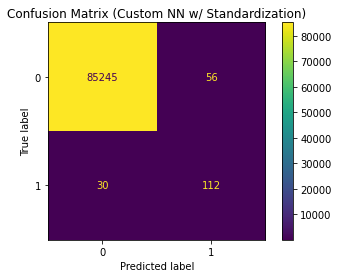

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_test, y_pred_list, labels=[0 ,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Confusion Matrix (Custom NN w/ Standardization)')
plt.show()

exp 1: When Batch size is 32 (without any scaling), It could not identify Fraud as Fraud </br>
exp 2: When Batch size is 32 (with Normalization), It could not identify Fraud as Fraud and 3 wrong to detect 0 </br>
exp 3: When Batch size is 32 (with Standardization), same result as exp1 </br>

exp 4: When Batch size is 2024, still not learning for Fraud case </br>
exp 5: When Batch size is 4048, it starts to learn for the Fraud case detecting 68 Fraud cases out of 96

exp 5, Batch size 4048 and Sampler, results in found 74 Fraud cases out of 96.





In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

#### ROC Curve

In [35]:
customNN_auroc = roc_auc_score(y_test, y_pred_list)
customNN_fpr, customNN_tpr, _ = roc_curve(y_test, y_pred_list)

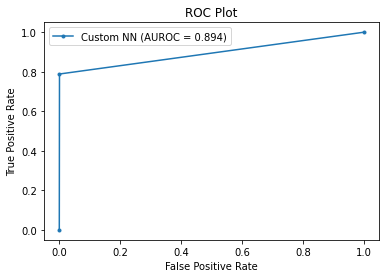

In [36]:
plt.plot(customNN_fpr, customNN_tpr, marker='.', label='Custom NN (AUROC = %0.3f)' % customNN_auroc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

#### Precision-Recall Curve

In [37]:
customNN_p, customNN_r, _ = precision_recall_curve(y_test, y_pred_list)
customNNauc = auc(customNN_r, customNN_p)

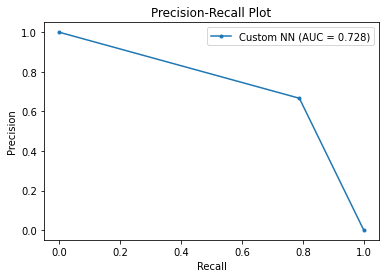

In [38]:
plt.plot(customNN_r, customNN_p, marker='.', label='Custom NN (AUC = %0.3f)' % customNNauc)

# Title
plt.title('Precision-Recall Plot')
# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Model Comparison

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

## ROC and AUROC

ROC - Receiver Operating Characteristic </br>
AUROC - Area Under the ROC curve

#### AUROC

In [40]:
r_auroc = roc_auc_score(y_test, r_probs)
lr_auroc = roc_auc_score(y_test, lr_probs)
knn_auroc = roc_auc_score(y_test, knn_probs)
svm_auroc = roc_auc_score(y_test, svm_probs)
nb_auroc = roc_auc_score(y_test, nb_probs)
dt_auroc = roc_auc_score(y_test, dt_probs)
rf_auroc = roc_auc_score(y_test, rf_probs)
gb_auroc = roc_auc_score(y_test, gb_probs)
bb_auroc = roc_auc_score(y_test, bb_probs)

In [41]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auroc))
print('Logistic Regression    : AUROC = %.3f' % (lr_auroc))
print('K Nearest Neighbors    : AUROC = %.3f' % (knn_auroc))
print('Support Vector Machine : AUROC = %.3f' % (svm_auroc))
print('Naive Bayes            : AUROC = %.3f' % (nb_auroc))
print('Decision Tree          : AUROC = %.3f' % (dt_auroc))
print('Random Forest          : AUROC = %.3f' % (rf_auroc))
print('Gradient Boosting.     : AUROC = %.3f' % (gb_auroc))
print('Balanced Bagging       : AUROC = %.3f' % (bb_auroc))
print('Custom NN.             : AUROC = %.3f' % (customNN_auroc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression    : AUROC = 0.975
K Nearest Neighbors    : AUROC = 0.894
Support Vector Machine : AUROC = 0.958
Naive Bayes            : AUROC = 0.952
Decision Tree          : AUROC = 0.869
Random Forest          : AUROC = 0.942
Gradient Boosting.     : AUROC = 0.845
Balanced Bagging       : AUROC = 0.955
Custom NN.             : AUROC = 0.894


### ROC Curve

In [42]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
bb_fpr, bb_tpr, _ = roc_curve(y_test, bb_probs)

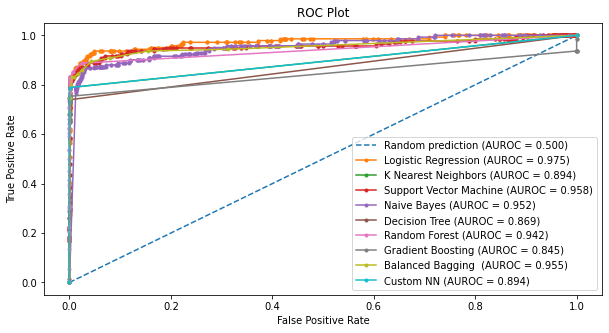

In [43]:
plt.figure(figsize=(10,5))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auroc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auroc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auroc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svm_auroc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auroc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auroc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auroc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auroc)
plt.plot(bb_fpr, bb_tpr, marker='.', label='Balanced Bagging  (AUROC = %0.3f)' % bb_auroc)
plt.plot(customNN_fpr, customNN_tpr, marker='.', label='Custom NN (AUROC = %0.3f)' % customNN_auroc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

The score is a value between 0.0 and 1.0 for a perfect classifier.

For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score.

"Although ROC graphs are widely used to evaluate classifiers under presence of class imbalance, it has a drawback: under class rarity, that is, when the problem of class imbalance is associated to the presence of a low sample size of minority instances, as the estimates can be unreliable." </br>
— Page 55, Learning from Imbalanced Data Sets, 2018.

### Precision-Recall Curves

Precision = TP/(TP+FP) </br>
Recall = TP/(TP+FN) </br>
PR Curve: Plot of Recall(x) vs. Precision(y) </br>

"Precision-recall curves (PR curves) are recommended for highly skewed domains where ROC curves may provide an excessively optimistic view of the performance."

— A Survey of Predictive Modelling under Imbalanced Distributions, 2015.

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [45]:
# Calculate the precision-recall curve
lr_p, lr_r, _ = precision_recall_curve(y_test, lr_probs)
knn_p, knn_r, _ = precision_recall_curve(y_test, knn_probs)
svm_p, svm_r, _ = precision_recall_curve(y_test, svm_probs)
nb_p, nb_r, _ = precision_recall_curve(y_test, nb_probs)
dt_p, dt_r, _ = precision_recall_curve(y_test, dt_probs)
rf_p, rf_r, _ = precision_recall_curve(y_test, rf_probs)
gb_p, gb_r, _ = precision_recall_curve(y_test, gb_probs)
bb_p, bb_r, _ = precision_recall_curve(y_test, bb_probs)

In [46]:
# Calculate the AUC of precision-recall curve
lr_auc = auc(lr_r, lr_p)
knn_auc = auc(knn_r, knn_p)
svm_auc = auc(svm_r, svm_p)
nb_auc = auc(nb_r, nb_p)
dt_auc = auc(dt_r, dt_p)
rf_auc = auc(rf_r, rf_p)
gb_auc = auc(gb_r, gb_p)
bb_auc = auc(bb_r, bb_p)

In [47]:
from sklearn.dummy import DummyClassifier

# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
naive_probs = yhat[:, 1]

# calculate the precision-recall auc
naive_p, naive_r, _ = precision_recall_curve(y_test, naive_probs)
naive_auc = auc(naive_r, naive_p)

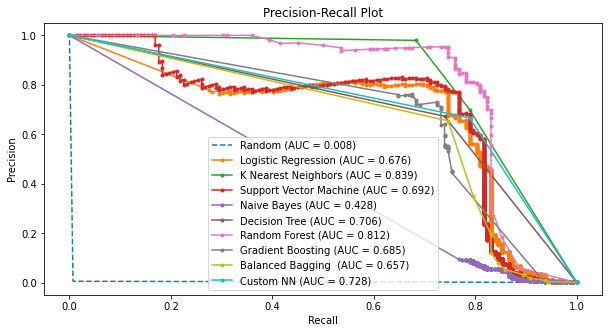

In [48]:
plt.figure(figsize=(10,5))
plt.plot(naive_r, naive_p, linestyle='--', label='Random (AUC = %0.3f)' % naive_auc)
plt.plot(lr_r, lr_p, marker='.', label='Logistic Regression (AUC = %0.3f)' % lr_auc)
plt.plot(knn_r, knn_p, marker='.', label='K Nearest Neighbors (AUC = %0.3f)' % knn_auc)
plt.plot(svm_r, svm_p, marker='.', label='Support Vector Machine (AUC = %0.3f)' % svm_auc)
plt.plot(nb_r, nb_p, marker='.', label='Naive Bayes (AUC = %0.3f)' % nb_auc)
plt.plot(dt_r, dt_p, marker='.', label='Decision Tree (AUC = %0.3f)' % dt_auc)
plt.plot(rf_r, rf_p, marker='.', label='Random Forest (AUC = %0.3f)' % rf_auc)
plt.plot(gb_r, gb_p, marker='.', label='Gradient Boosting (AUC = %0.3f)' % gb_auc)
plt.plot(bb_r, bb_p, marker='.', label='Balanced Bagging  (AUC = %0.3f)' % bb_auc)
plt.plot(customNN_r, customNN_p, marker='.', label='Custom NN (AUC = %0.3f)' % customNNauc)

# Title
plt.title('Precision-Recall Plot')
# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### Confusion Matrix

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [50]:
rounded_lr_probs = np.round(lr_probs)
rounded_knn_probs = np.round(knn_probs)
rounded_svm_probs = np.round(svm_probs)
rounded_nb_probs = np.round(nb_probs)
rounded_dt_probs = np.round(dt_probs)
rounded_rf_probs = np.round(rf_probs)
rounded_gb_probs = np.round(gb_probs)
rounded_bb_probs = np.round(bb_probs)

In [51]:
lr_cm = confusion_matrix(y_test, rounded_lr_probs, labels=lr.classes_)
knn_cm = confusion_matrix(y_test, rounded_knn_probs, labels=knn.classes_)
svm_cm = confusion_matrix(y_test, rounded_svm_probs, labels=svm.classes_)
nb_cm = confusion_matrix(y_test, rounded_nb_probs, labels=nb.classes_)
dt_cm = confusion_matrix(y_test, rounded_dt_probs, labels=dt.classes_)
rf_cm = confusion_matrix(y_test, rounded_rf_probs, labels=rf.classes_)
gb_cm = confusion_matrix(y_test, rounded_gb_probs, labels=gb.classes_)
bb_cm = confusion_matrix(y_test, rounded_bb_probs, labels=bb.classes_)

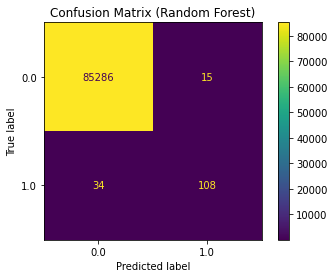

In [52]:
cm = confusion_matrix(y_test, rounded_rf_probs, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.title('Confusion Matrix (Random Forest)')
plt.show()

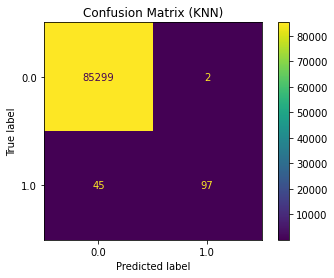

In [53]:
cm = confusion_matrix(y_test, rounded_knn_probs, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix (KNN)')
plt.show()

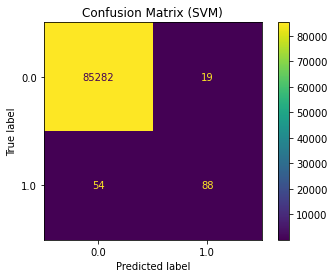

In [54]:
cm = confusion_matrix(y_test, rounded_svm_probs, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.title('Confusion Matrix (SVM)')
plt.show()

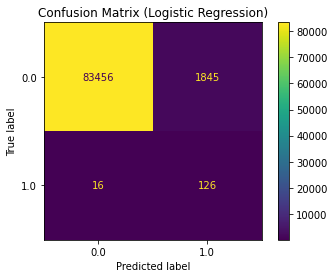

In [55]:
cm = confusion_matrix(y_test, rounded_lr_probs, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

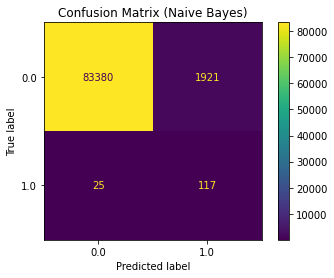

In [56]:
cm = confusion_matrix(y_test, rounded_nb_probs, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

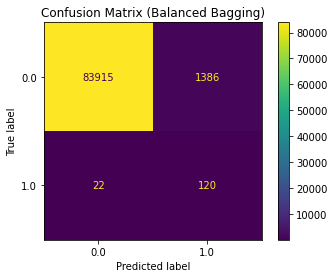

In [57]:
cm = confusion_matrix(y_test, rounded_bb_probs, labels=bb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bb.classes_)
disp.plot()
plt.title('Confusion Matrix (Balanced Bagging)')
plt.show()

### Clarification Report

In [58]:
lr_cr = classification_report(y_test, rounded_lr_probs, output_dict=True)
knn_cr = classification_report(y_test, rounded_knn_probs, output_dict=True)
svm_cr = classification_report(y_test, rounded_svm_probs, output_dict=True)
nb_cr = classification_report(y_test, rounded_nb_probs, output_dict=True)
dt_cr = classification_report(y_test, rounded_dt_probs, output_dict=True)
rf_cr = classification_report(y_test, rounded_rf_probs, output_dict=True)
gb_cr = classification_report(y_test, rounded_gb_probs, output_dict=True)
bb_cr = classification_report(y_test, rounded_bb_probs, output_dict=True)
customNN_cr = classification_report(y_test, y_pred_list, output_dict=True)

In [59]:
from sklearn.metrics import accuracy_score

lr_acc = accuracy_score(y_test, rounded_lr_probs)
knn_acc = accuracy_score(y_test, rounded_knn_probs)
svm_acc = accuracy_score(y_test, rounded_svm_probs)
nb_acc = accuracy_score(y_test, rounded_nb_probs)
dt_acc = accuracy_score(y_test, rounded_dt_probs)
rf_acc = accuracy_score(y_test, rounded_rf_probs)
gb_acc = accuracy_score(y_test, rounded_gb_probs)
bb_acc = accuracy_score(y_test, rounded_bb_probs)
customNN_acc = accuracy_score(y_test, y_pred_list)

In [60]:
lr_res = [round(lr_acc,3), round(lr_cr['1.0']['f1-score'],3), round(lr_cr['1.0']['precision'],3), round(lr_cr['1.0']['recall'],3)]
knn_res = [round(knn_acc, 3), round(knn_cr['1.0']['f1-score'], 3), round(knn_cr['1.0']['precision'],3), round(knn_cr['1.0']['recall'],3)]
svm_res = [round(svm_acc, 3), round(svm_cr['1.0']['f1-score'], 3), round(svm_cr['1.0']['precision'], 3), round(svm_cr['1.0']['recall'], 3)]
nb_res = [round(nb_acc, 3), round(nb_cr['1.0']['f1-score'], 3), round(nb_cr['1.0']['precision'], 3), round(nb_cr['1.0']['recall'], 3)]
dt_res = [round(dt_acc, 3), round(dt_cr['1.0']['f1-score'], 3), round(dt_cr['1.0']['precision'], 3), round(dt_cr['1.0']['recall'], 3)]
rf_res = [round(rf_acc, 3), round(rf_cr['1.0']['f1-score'], 3), round(rf_cr['1.0']['precision'], 3), round(rf_cr['1.0']['recall'], 3)]
gb_res = [round(gb_acc, 3), round(gb_cr['1.0']['f1-score'], 3), round(gb_cr['1.0']['precision'], 3), round(gb_cr['1.0']['recall'], 3)]
bb_res = [round(bb_acc, 3), round(bb_cr['1.0']['f1-score'], 3), round(bb_cr['1.0']['precision'], 3), round(bb_cr['1.0']['recall'], 3)]
customNN_res = [round(customNN_acc, 3), round(customNN_cr['1.0']['f1-score'], 3), round(customNN_cr['1.0']['precision'], 3), round(customNN_cr['1.0']['recall'], 3)]

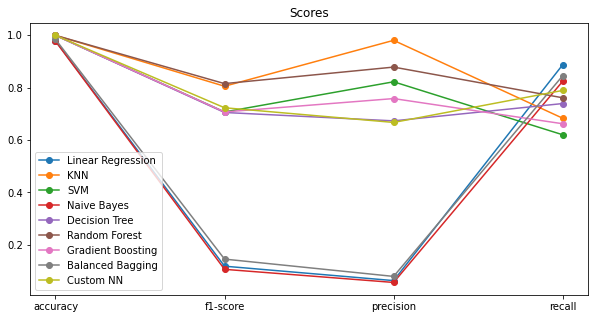

Linear Regression:  [0.978, 0.119, 0.064, 0.887]
KNN              :  [0.999, 0.805, 0.98, 0.683]
SVM              :  [0.999, 0.707, 0.822, 0.62]
Naive Bayes.     :  [0.977, 0.107, 0.057, 0.824]
Decision Tree.   :  [0.999, 0.705, 0.673, 0.739]
Random Forest.   :  [0.999, 0.815, 0.878, 0.761]
Gradient Boosting:  [0.999, 0.707, 0.758, 0.662]
Balanced Bagging :  [0.984, 0.146, 0.08, 0.845]
Custom NN        :  [0.999, 0.723, 0.667, 0.789]


In [61]:
plt.figure(figsize=(10,5))
scores = ['accuracy', 'f1-score', 'precision', 'recall']
plt.plot(scores, lr_res, '-o',label='Linear Regression')
plt.plot(scores, knn_res, '-o',label='KNN')
plt.plot(scores, svm_res, '-o',label='SVM')
plt.plot(scores, nb_res, '-o',label='Naive Bayes')
plt.plot(scores, dt_res, '-o',label='Decision Tree')
plt.plot(scores, rf_res, '-o',label='Random Forest')
plt.plot(scores, gb_res, '-o',label='Gradient Boosting')
plt.plot(scores, bb_res, '-o',label='Balanced Bagging')
plt.plot(scores, customNN_res, '-o',label='Custom NN')

plt.title('Scores')
plt.legend(loc='best')
plt.show()
print('Linear Regression: ', lr_res)
print('KNN              : ', knn_res)
print('SVM              : ', svm_res)
print('Naive Bayes.     : ', nb_res)
print('Decision Tree.   : ', dt_res)
print('Random Forest.   : ', rf_res)
print('Gradient Boosting: ', gb_res)
print('Balanced Bagging : ', bb_res)
print('Custom NN        : ', customNN_res)

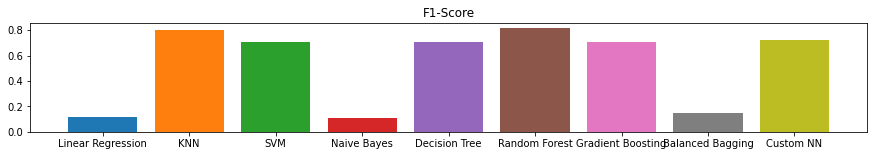

In [62]:
plt.figure(figsize=(15,2))
plt.bar('Linear Regression', lr_cr['1.0']['f1-score'])
plt.bar('KNN', knn_cr['1.0']['f1-score'])
plt.bar('SVM', svm_cr['1.0']['f1-score'])
plt.bar('Naive Bayes', nb_cr['1.0']['f1-score'])
plt.bar('Decision Tree', dt_cr['1.0']['f1-score'])
plt.bar('Random Forest', rf_cr['1.0']['f1-score'])
plt.bar('Gradient Boosting', gb_cr['1.0']['f1-score'])
plt.bar('Balanced Bagging', bb_cr['1.0']['f1-score'])
plt.bar('Custom NN', customNN_cr['1.0']['f1-score'])
plt.title('F1-Score')
plt.show()

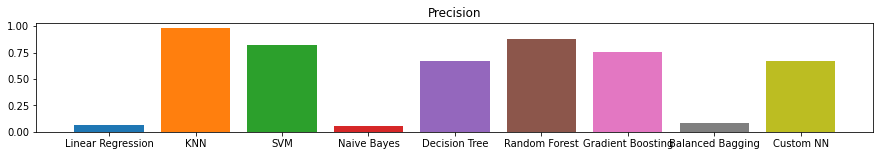

In [63]:
plt.figure(figsize=(15,2))
plt.bar('Linear Regression', lr_cr['1.0']['precision'])
plt.bar('KNN', knn_cr['1.0']['precision'])
plt.bar('SVM', svm_cr['1.0']['precision'])
plt.bar('Naive Bayes', nb_cr['1.0']['precision'])
plt.bar('Decision Tree', dt_cr['1.0']['precision'])
plt.bar('Random Forest', rf_cr['1.0']['precision'])
plt.bar('Gradient Boosting', gb_cr['1.0']['precision'])
plt.bar('Balanced Bagging', bb_cr['1.0']['precision'])
plt.bar('Custom NN', customNN_cr['1.0']['precision'])
plt.title('Precision')
plt.show()

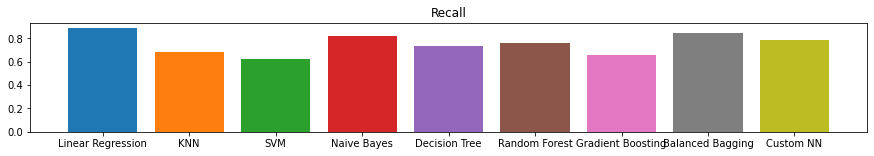

In [64]:
plt.figure(figsize=(15,2))
plt.bar('Linear Regression', lr_cr['1.0']['recall'])
plt.bar('KNN', knn_cr['1.0']['recall'])
plt.bar('SVM', svm_cr['1.0']['recall'])
plt.bar('Naive Bayes', nb_cr['1.0']['recall'])
plt.bar('Decision Tree', dt_cr['1.0']['recall'])
plt.bar('Random Forest', rf_cr['1.0']['recall'])
plt.bar('Gradient Boosting', gb_cr['1.0']['recall'])
plt.bar('Balanced Bagging', bb_cr['1.0']['recall'])
plt.bar('Custom NN', customNN_cr['1.0']['recall'])
plt.title('Recall')
plt.show()

# Result

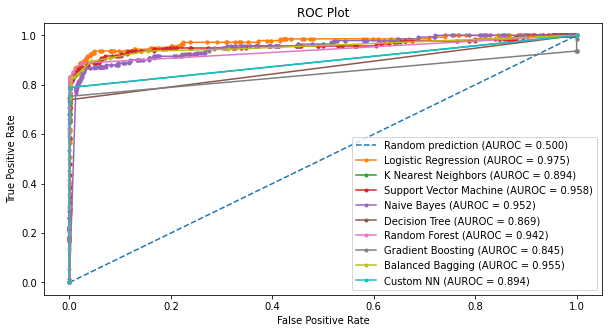

In [65]:
plt.figure(figsize=(10,5))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auroc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auroc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auroc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svm_auroc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auroc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auroc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auroc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auroc)
plt.plot(bb_fpr, bb_tpr, marker='.', label='Balanced Bagging (AUROC = %0.3f)' % bb_auroc)
plt.plot(customNN_fpr, customNN_tpr, marker='.', label='Custom NN (AUROC = %0.3f)' % customNN_auroc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

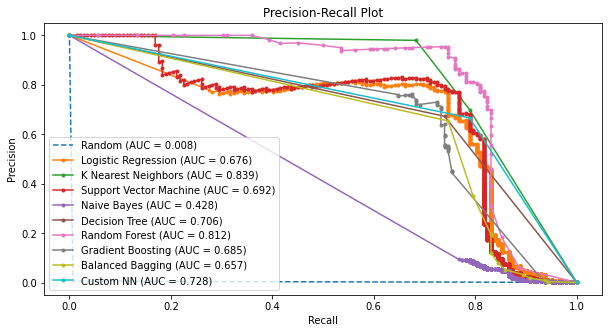

In [68]:
plt.figure(figsize=(10,5))
plt.plot(naive_r, naive_p, linestyle='--', label='Random (AUC = %0.3f)' % naive_auc)
plt.plot(lr_r, lr_p, marker='.', label='Logistic Regression (AUC = %0.3f)' % lr_auc)
plt.plot(knn_r, knn_p, marker='.', label='K Nearest Neighbors (AUC = %0.3f)' % knn_auc)
plt.plot(svm_r, svm_p, marker='.', label='Support Vector Machine (AUC = %0.3f)' % svm_auc)
plt.plot(nb_r, nb_p, marker='.', label='Naive Bayes (AUC = %0.3f)' % nb_auc)
plt.plot(dt_r, dt_p, marker='.', label='Decision Tree (AUC = %0.3f)' % dt_auc)
plt.plot(rf_r, rf_p, marker='.', label='Random Forest (AUC = %0.3f)' % rf_auc)
plt.plot(gb_r, gb_p, marker='.', label='Gradient Boosting (AUC = %0.3f)' % gb_auc)
plt.plot(bb_r, bb_p, marker='.', label='Balanced Bagging (AUC = %0.3f)' % bb_auc)
plt.plot(customNN_r, customNN_p, marker='.', label='Custom NN (AUC = %0.3f)' % customNNauc)

# Title
plt.title('Precision-Recall Plot')
# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# Show legend
plt.legend(loc='lower left') # 
# Show plot
plt.show()